In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from datasets.utils import load
import default_config

INFO: Using pytorch backend


### Plot place cell activity at each angle

INFO: # - No file at data/expt7_times_timestep1000000.txt. Preprocessing needed:
INFO: Loading experiment 7 to bin firing times into times...
INFO: Nb of firing times (all cells) before deleting duplicates: 16799.
INFO: Nb of firing times  (all cells) after deleting duplicates: 16793.
INFO: # - Saving times of shape (3901,) to data/expt7_times_timestep1000000.txt...
INFO: # - No file at data/expt7_place_cells_timestep1000000.npy. Preprocessing needed:
INFO: Number of cells: 12
INFO: Counting firings per time-step in cell 0...
INFO: Counting firings per time-step in cell 1...
INFO: Counting firings per time-step in cell 2...
INFO: Counting firings per time-step in cell 3...
INFO: Counting firings per time-step in cell 4...
INFO: Counting firings per time-step in cell 5...
INFO: Counting firings per time-step in cell 6...
INFO: Counting firings per time-step in cell 7...
INFO: Counting firings per time-step in cell 8...
INFO: Counting firings per time-step in cell 9...
INFO: Counting fir

             times      angles  velocities  gains
0     3.104026e+09   14.812221    0.069119  1.000
1     3.105026e+09   15.325700    0.709599  1.000
2     3.106026e+09   19.369681    7.031484  1.000
3     3.107026e+09   24.497929    8.734093  1.000
4     3.108026e+09   33.447604    2.174244  1.000
...            ...         ...         ...    ...
3895  6.999026e+09  141.232493   39.206955  0.231
3896  7.000026e+09  176.128860   17.965603  0.231
3897  7.001026e+09  192.233665   20.976622  0.231
3898  7.002026e+09  200.983470    2.648439  0.231
3899  7.003026e+09  219.975774   33.663022  0.231

[3900 rows x 4 columns]
Dataset shape: (2513, 12).


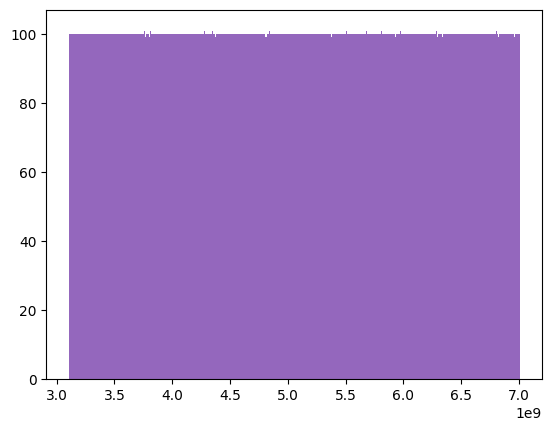

In [10]:
dataset_torch, labels, train_loader, test_loader = load(default_config)
thetas = np.array(labels["angles"])
sort = np.argsort(thetas)
sorted_thetas = thetas[sort]
dataset = dataset_torch.detach().numpy()
sorted_dataset = dataset[sort,:]

In [2]:
dataset.shape

NameError: name 'dataset' is not defined

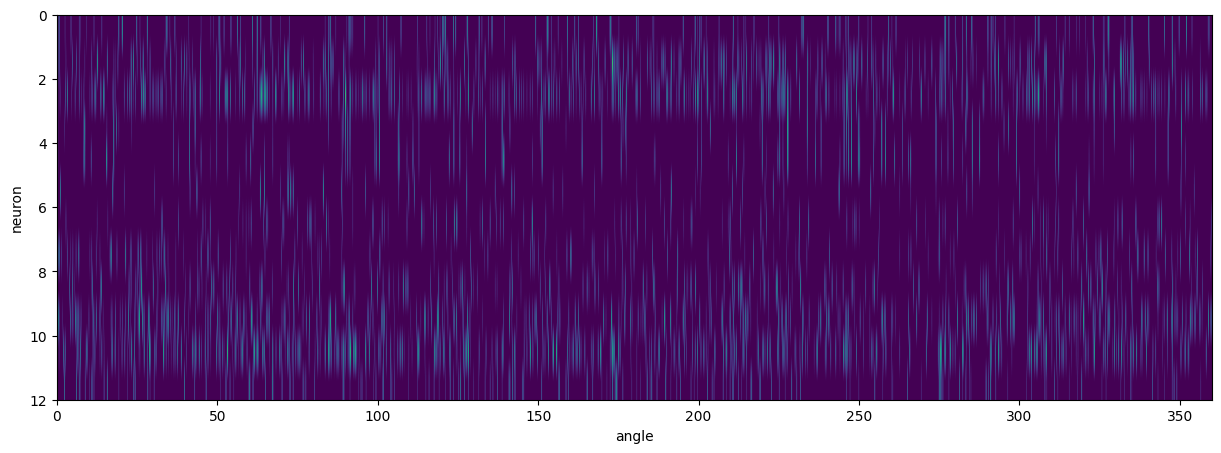

In [11]:
plt.figure(figsize=(20,5))
plt.xlabel("angle")
plt.ylabel("neuron")

plt.imshow(sorted_dataset.T,extent = [0,360,sorted_dataset.shape[1],0],aspect = 10)

In [4]:
sorted_dataset.shape

(1448, 15)

In [5]:
import torch
filename = "/Users/franciscoacosta/Desktop/code/neuralgeom/neuralgeom/results/trained_models/experimental_2022-10-27 14:54:00_model.pt"
model = torch.load(filename)


rec, params = model(dataset_torch)

rec = rec.detach().numpy()
sorted_rec = rec[sort,:]

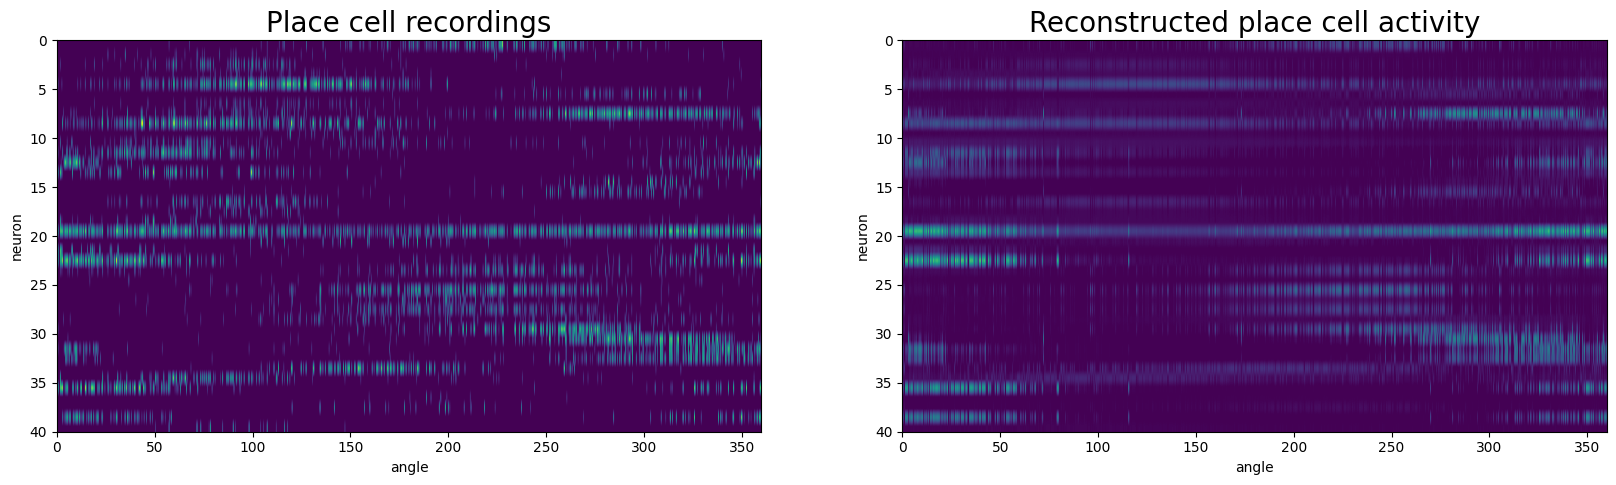

In [6]:
import matplotlib as mpl
color_norm = mpl.colors.Normalize(0.0, np.max(sorted_dataset))

fig = plt.figure(figsize=(20,10))

ax_data = fig.add_subplot(121)

ax_data.set_xlabel("angle")
ax_data.set_ylabel("neuron")

ax_data.set_title("Place cell recordings", fontsize=20)

im_data = ax_data.imshow(sorted_dataset.T,extent = [0,360,40,0],aspect = 5, norm=color_norm,cmap="viridis")

ax_rec = fig.add_subplot(122)

ax_rec.set_xlabel("angle")
ax_rec.set_ylabel("neuron")

ax_rec.set_title("Reconstructed place cell activity",fontsize=20)

im_rec = ax_rec.imshow(sorted_rec.T,extent = [0,360,40,0],aspect = 5, norm=color_norm, cmap="viridis")

Text(0.5, 1.0, 'Reconstructed activity distribution')

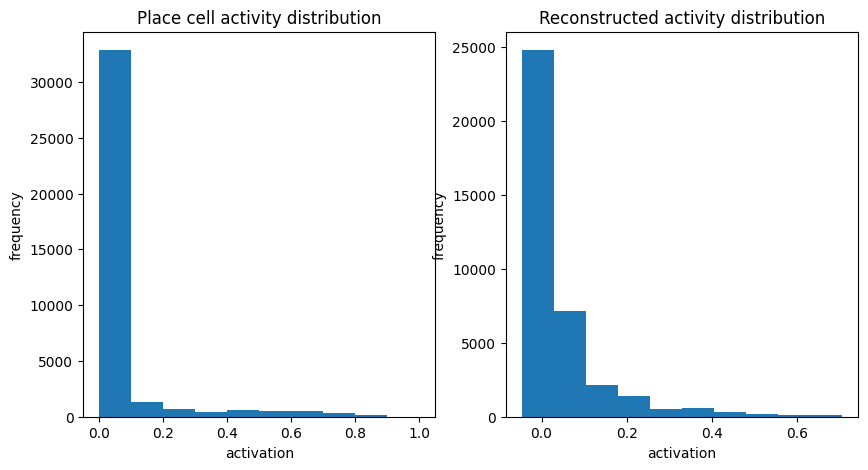

In [7]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)

ax1.hist(sorted_dataset.flatten())

ax2 = fig.add_subplot(122)

ax2.hist(sorted_rec.flatten())

ax1.set_xlabel("activation")

ax1.set_ylabel("frequency")

ax2.set_xlabel("activation")

ax2.set_ylabel("frequency")

ax1.set_title("Place cell activity distribution")

ax2.set_title("Reconstructed activity distribution")